# Forecast Results Analysis

In this project, we have developed predictive models to estimate the number of patients diagnosed with various conditions, including COVID-19, influenza (grippe), respiratory syncytial virus (RSV), and other respiratory infections. Additionally, we aim to predict hospital admissions, deaths, and patients in critical care units over a two-week period.

## Data Overview

The forecast results are stored in a CSV file named `forecast_df.csv`. This file contains the following columns:

1. **Disease**: This column specifies the type of disease or condition being predicted. Possible values include:
    - COVID: COVID-19 cases
    - Grippe: Influenza cases
    - IR Autveirus: Other respiratory infections
    - Generale: General predictions (if applicable)
    - RSV: Respiratory Syncytial Virus cases

2. **Parameter**: This column indicates the parameter being predicted. Possible values include:
    - Nombre de patient: Number of patients
    - Nombre de mort: Number of deaths
    - Soin critique: Number of patients in critical care units

3. **Forecast**: This column contains a vector of predictions for the number of cases or patients for the upcoming two weeks. The vector includes predictions for the next two weeks in the following format:
    - Prediction for Week n+1
    - Prediction for Week n+2

4. **conf_int_lower**: This column provides the lower bounds of the confidence intervals for the predictions. It is also a vector containing lower bounds for Week n+1 and Week n+2.

5. **conf_int_upper**: This column provides the upper bounds of the confidence intervals for the predictions. It is a vector containing upper bounds for Week n+1 and Week n+2.


# Interpreting the Results

### Disease and Parameter Selection

To interpret the results, start by selecting the disease and parameter of interest. Depending on your research questions, you can choose from diseases like COVID-19, influenza, RSV, or other respiratory infections, and parameters such as the number of patients, deaths, or patients in critical care units.

### Forecast and Confidence Intervals

For the selected disease and parameter, you can use the "Forecast" column to access predictions for the next two weeks. The forecast vector provides estimates for Week n+1 and Week n+2. These predictions can be valuable for planning and resource allocation.

Additionally, the "conf_int_lower" and "conf_int_upper" columns provide confidence intervals for the predictions. These intervals help assess the uncertainty associated with the forecasts. You can use this information to gauge the reliability of the predictions.

### Data Visualization

To visualize the results, you can create plots with the weeks on the x-axis and the number of cases, deaths, or patients in critical care units on the y-axis. This will help you track the trends and make informed decisions based on the forecasts.

## Conclusion

The `forecast_df.csv` file contains predictions and confidence intervals for various diseases and parameters. 

# Exploring Forecast Data with Plots

In this section, we'll explore an example of type of plot that can be created using the data from `forecast_df.csv`. These visualizations will help you gain insights into the predictions for different diseases and parameters over the next two weeks. 
A line plot is a simple and effective way to visualize the trend of predictions over time. You can create line plots to show how the number of cases, deaths, or patients in critical care units change over the next two weeks for a specific disease and parameter. This type of plot provides a clear overview of the predicted trajectory.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


In [7]:
data = pd.read_csv('../data/05_model_input/filtered_df.csv')
prediction = pd.read_csv('../data/07_model_output/forecast_df.csv')
data

,LIB_SEM,CATEG_DIAG,NB_PATIENTS,NB_IS_DEATH,NB_IS_CRITIC
0,2023-01-02,COVID_19,80,5,20
1,2023-01-09,COVID_19,68,3,12
2,2023-01-16,COVID_19,45,4,10
3,2023-01-23,COVID_19,54,4,6
4,2023-01-30,COVID_19,35,2,6
...,...,...,...,...,...
113,2023-03-27,RSV,1,0,1
114,2023-04-03,RSV,2,0,1
115,2023-04-10,RSV,1,0,0
116,2023-04-17,RSV,2,0,0


In [8]:
# Create columns using a loop
for i in range(1, week + 1):
    # Column "forecast_week_i"
    prediction[f"forecast_week_{i}"] = prediction["Forecast"].apply(lambda x: float(x.strip("[]").split()[i - 1]))

    # Columns "conf_up_week_i" and "conf_lo_week_i"
    prediction[f"conf_up_week_{i}"] = prediction["conf_int_upper"].apply(lambda x: float(x.strip("[]").split()[i - 1]))
    prediction[f"conf_lo_week_{i}"] = prediction["conf_int_lower"].apply(lambda x: float(x.strip("[]").split()[i - 1]))

# Rename the DataFrame column from 'Disease' to 'CATEG_DIAG'
prediction = prediction.rename(columns={'Disease': 'CATEG_DIAG'})

# Display the updated DataFrame
prediction

,CATEG_DIAG,Parameter,Forecast,conf_int_lower,conf_int_upper,forecast_week_1,conf_up_week_1,conf_lo_week_1,forecast_week_2,conf_up_week_2,conf_lo_week_2
0,COVID_19,NB_PATIENTS,[2.13762759 2.04337179],[0. 0.],[17.40025586 20.89426642],2.137628e+00,17.400256,0.0,2.043372,20.894266,0.0
1,COVID_19,NB_IS_DEATH,[0.16087581 0.13175712],[0. 0.],[2.84542295 2.90059166],1.608758e-01,2.845423,0.0,0.131757,2.900592,0.0
2,COVID_19,NB_IS_CRITIC,[1.08189154 1.0659021 ],[0. 0.],[6.63227751 7.31136615],1.081892e+00,6.632278,0.0,1.065902,7.311366,0.0
3,GRIPPE,NB_PATIENTS,[1.33818894 0.83733805],[0. 0.],[11.5896739 15.671031 ],1.338189e+00,11.589674,0.0,0.837338,15.671031,0.0
4,GRIPPE,NB_IS_DEATH,[0.26744371 0.02374441],[0. 0.],[3.26382784 3.89352814],2.674437e-01,3.263828,0.0,0.023744,3.893528,0.0
5,GRIPPE,NB_IS_CRITIC,[0.18624993 0. ],[0. 0.],[ 7.22493412 10.00154441],1.862499e-01,7.224934,0.0,0.000000,10.001544,0.0
6,IR_AUTVIRUS,NB_PATIENTS,[3.52818784 2.80286413],[0. 0.],[10.71462127 10.09219586],3.528188e+00,10.714621,0.0,2.802864,10.092196,0.0
7,IR_AUTVIRUS,NB_IS_DEATH,[0.00790769 0.20143876],[0. 0.],[1.41540229 1.68413852],7.907690e-03,1.415402,0.0,0.201439,1.684139,0.0
8,IR_AUTVIRUS,NB_IS_CRITIC,[1.19392909 1.23211673],[0. 0.],[5.39543044 5.81524734],1.193929e+00,5.395430,0.0,1.232117,5.815247,0.0
9,IR_GENERALE,NB_PATIENTS,[10.73693886 0. ],[0. 0.],[45.96157474 20.0185668 ],1.073694e+01,45.961575,0.0,0.000000,20.018567,0.0


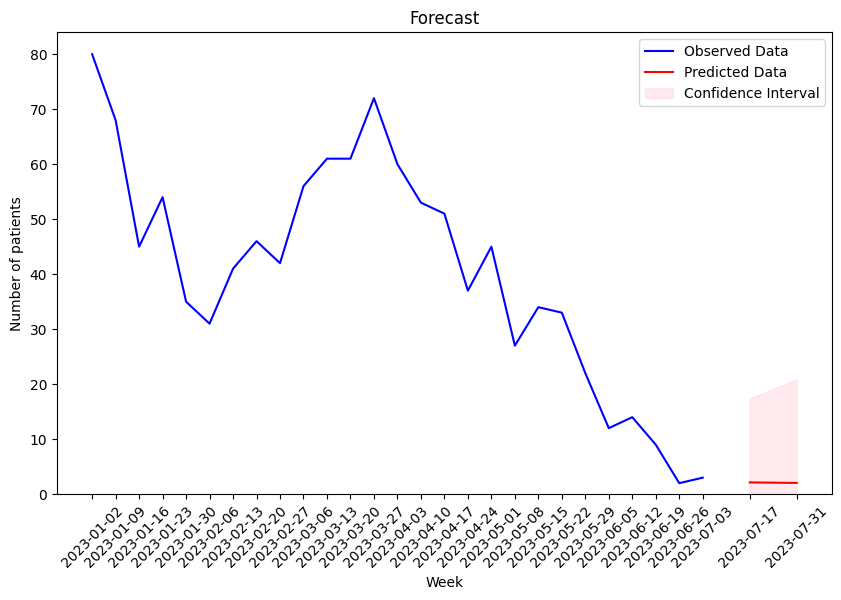

In [9]:
week = 2
time_series = list(data[data['CATEG_DIAG'] == selected_disease]["LIB_SEM"])

# Convert the dates into datetime objects
dates_datetime = [datetime.strptime(date, "%Y-%m-%d") for date in time_series]

# Find the last date in the list
last_date = dates_datetime[-1]

# Add two weeks to get the first date after the last one
new_date_1 = last_date + timedelta(weeks=week)

# Add two more weeks to get the second date after the last one
new_date_2 = new_date_1 + timedelta(weeks=week)

# Append the two new dates to the list
time_series.append(new_date_1.strftime("%Y-%m-%d"))
time_series.append(new_date_2.strftime("%Y-%m-%d"))
time_series = [datetime.strptime(date, "%Y-%m-%d") for date in time_series]


forecast_index = time_series[-week:]
observed_index = time_series[:-week] 
observed_data = data[data['CATEG_DIAG'] == selected_disease][selected_parameter]
forecast_data = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['forecast_week_1', 'forecast_week_2']].values.tolist()[0]
conf_int_low = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['conf_lo_week_1', 'conf_lo_week_2']].values.tolist()[0]
conf_int_up = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['conf_up_week_1', 'conf_up_week_2']].values.tolist()[0]


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(observed_index ,observed_data,label='Observed Data', color='blue')
plt.plot(forecast_index,forecast_data, label='Predicted Data', color='red')
plt.fill_between(forecast_index, conf_int_low, conf_int_up, color='pink', alpha=0.3, label='Confidence Interval')
plt.title("Forecast")
plt.xlabel("Week")
plt.ylabel("Number of patients")
plt.legend()
plt.ylim(bottom=0)
plt.xticks(time_series, [date.strftime("%Y-%m-%d") for date in time_series], rotation=45)
plt.show()


In [10]:
data

,LIB_SEM,CATEG_DIAG,NB_PATIENTS,NB_IS_DEATH,NB_IS_CRITIC
0,2023-01-02,COVID_19,80,5,20
1,2023-01-09,COVID_19,68,3,12
2,2023-01-16,COVID_19,45,4,10
3,2023-01-23,COVID_19,54,4,6
4,2023-01-30,COVID_19,35,2,6
...,...,...,...,...,...
113,2023-03-27,RSV,1,0,1
114,2023-04-03,RSV,2,0,1
115,2023-04-10,RSV,1,0,0
116,2023-04-17,RSV,2,0,0


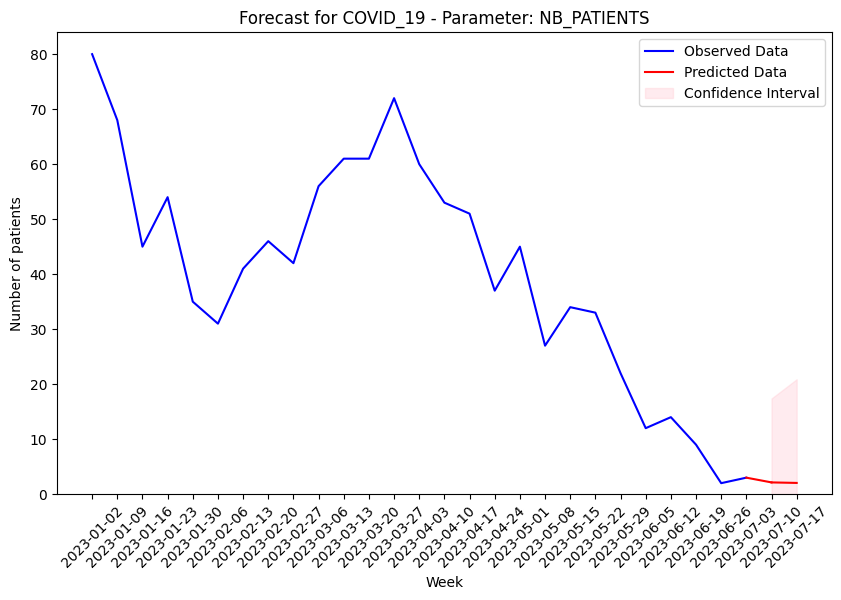

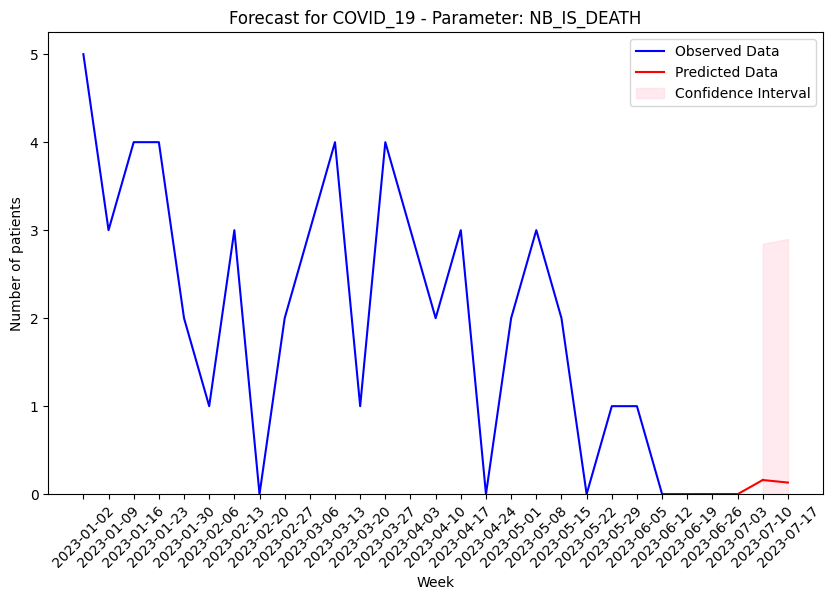

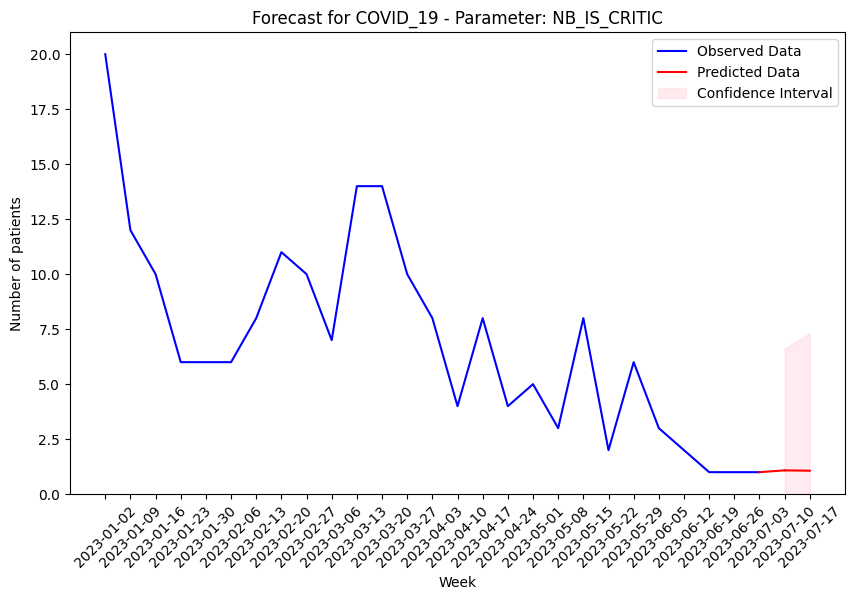

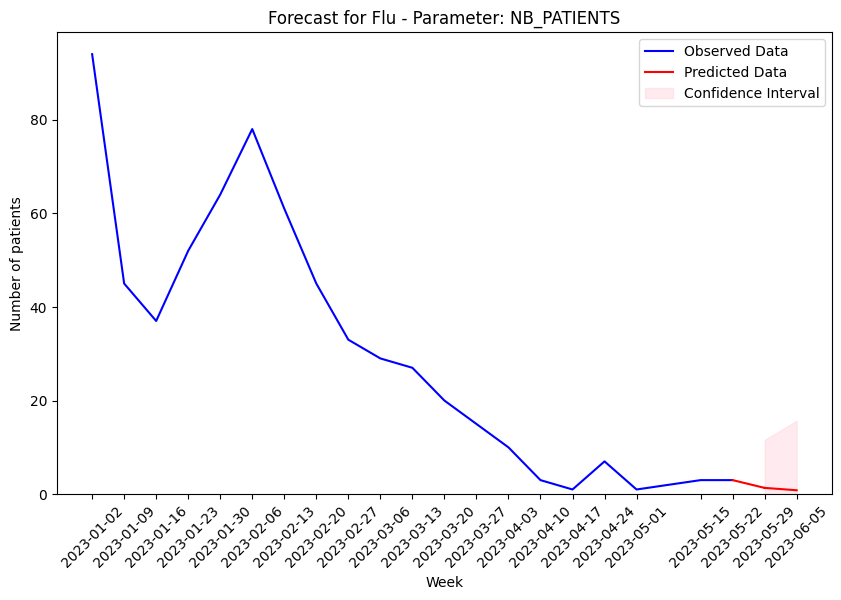

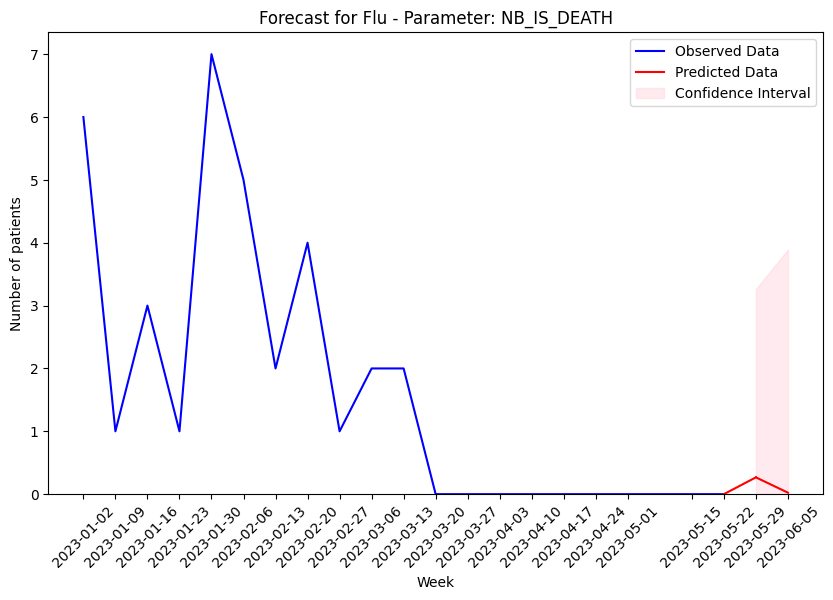

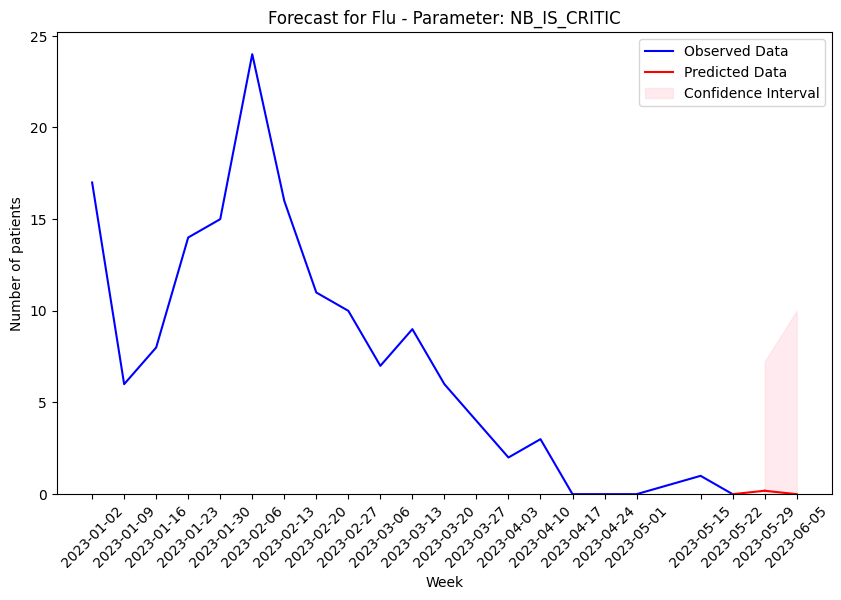

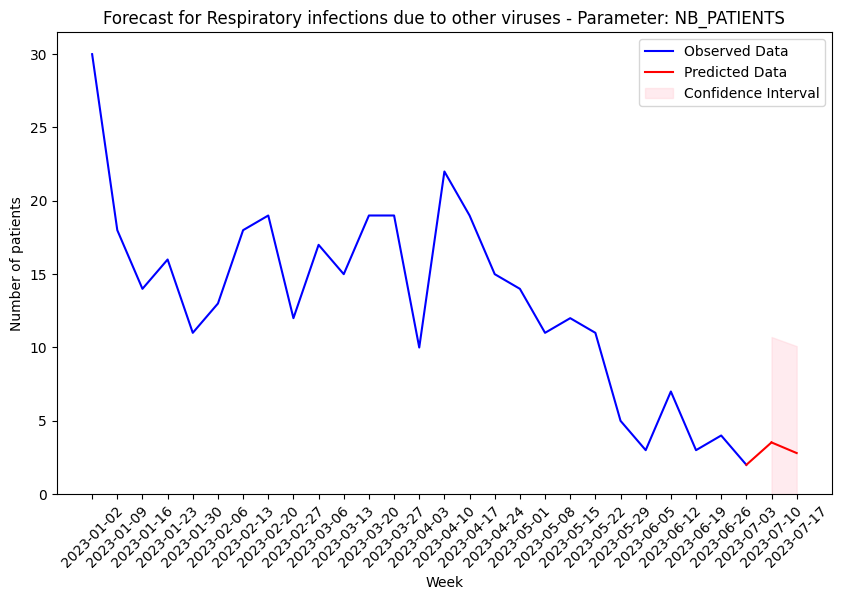

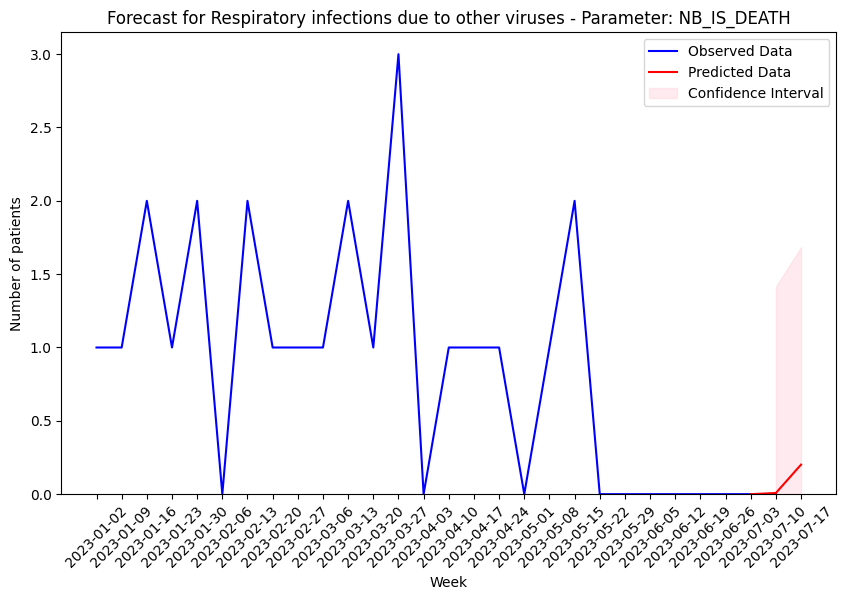

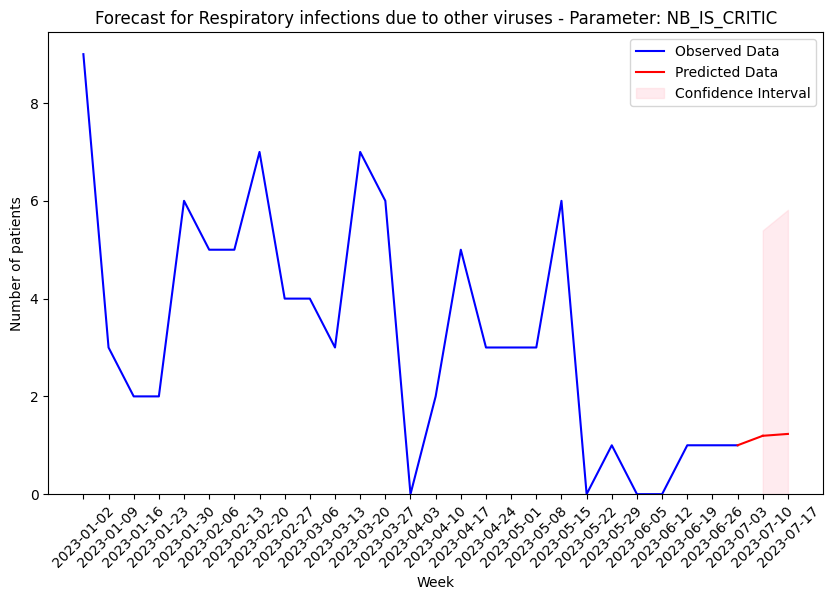

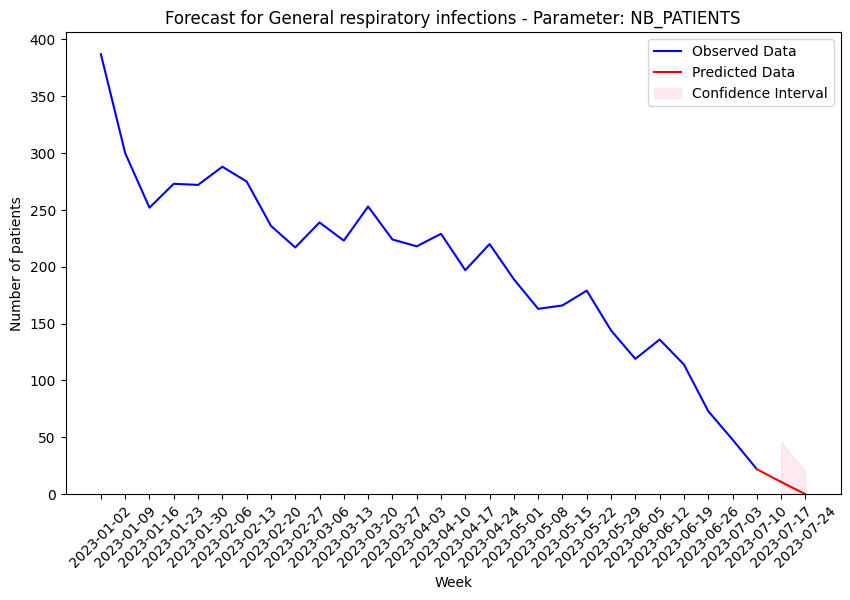

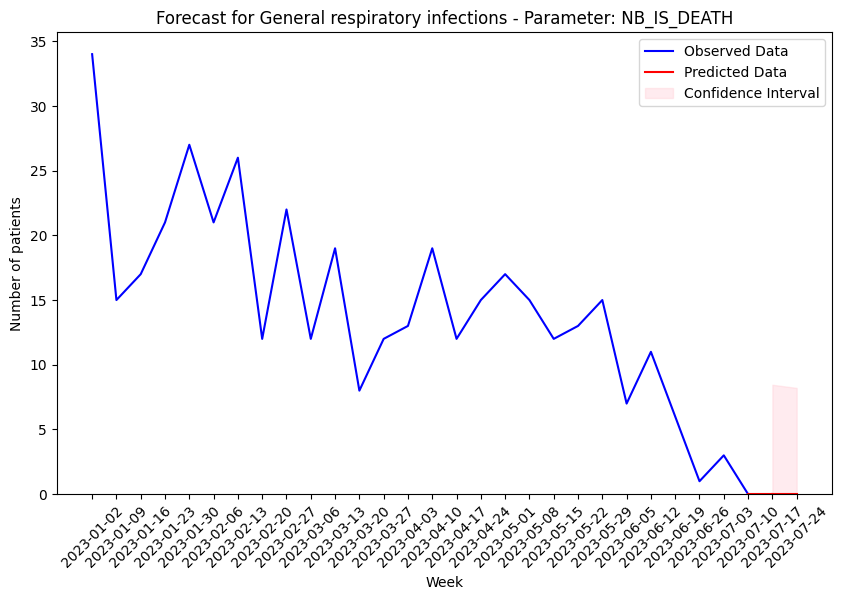

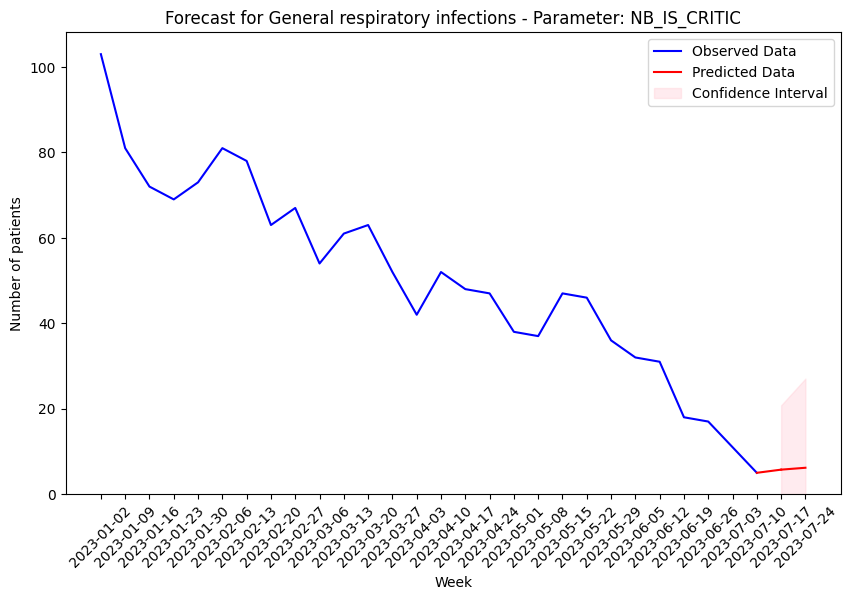

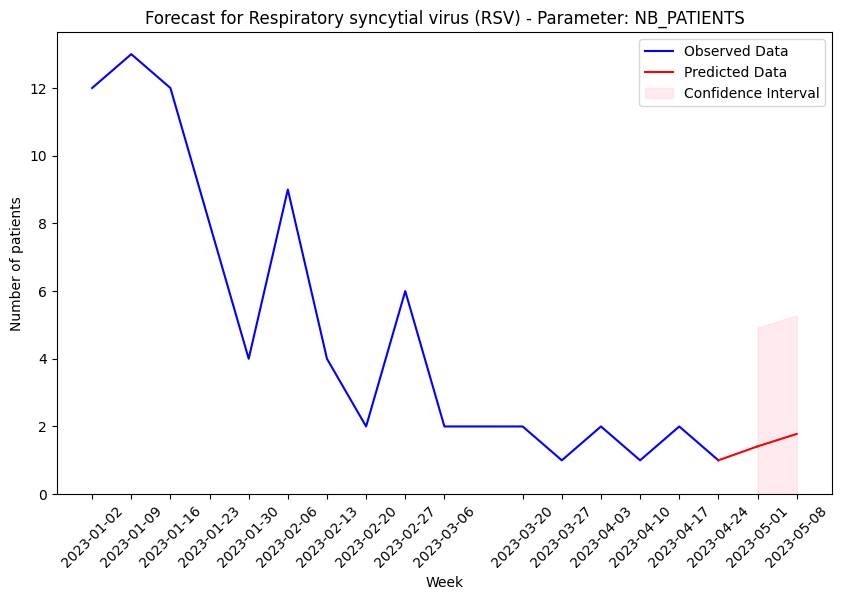

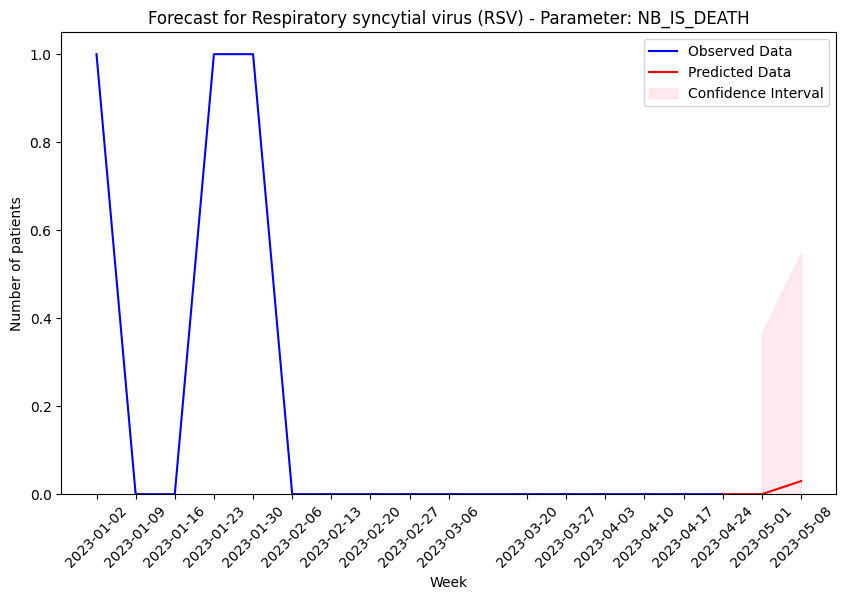

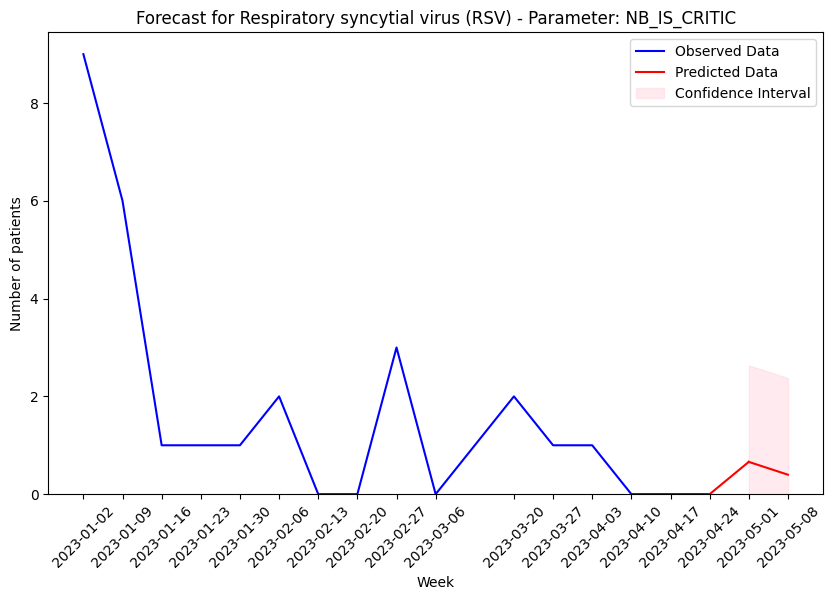

In [17]:

# Define the list of CATEG_DIAG values and selected parameters
categ_diag_values = data['CATEG_DIAG'].unique()
selected_parameters = ['NB_PATIENTS', 'NB_IS_DEATH', 'NB_IS_CRITIC']  # Replace with your parameter names

# Define custom disease labels
disease_labels = {
    'COVID-19': 'Covid-19',
    'GRIPPE': 'Flu',
    'IR_AUTVIRUS': 'Respiratory infections due to other viruses',
    'IR_GENERALE': 'General respiratory infections',
    'RSV': 'Respiratory syncytial virus (RSV)'
}

week = 2

# Loop over each CATEG_DIAG value and selected parameter
for selected_disease in categ_diag_values:
    for selected_parameter in selected_parameters:
        # Extract data for the selected disease and parameter
        time_series = list(data[data['CATEG_DIAG'] == selected_disease]["LIB_SEM"])

        # Convert the dates into datetime objects
        dates_datetime = [datetime.strptime(date, "%Y-%m-%d") for date in time_series]

        # Find the last date in the list
        last_date = dates_datetime[-1]

        # Add two weeks to get the first date after the last one
        new_date_1 = last_date + timedelta(weeks=week-1)

        # Add two more weeks to get the second date after the last one
        new_date_2 = new_date_1 + timedelta(weeks=week-1)

        # Append the two new dates to the list
        time_series.append(new_date_1.strftime("%Y-%m-%d"))
        time_series.append(new_date_2.strftime("%Y-%m-%d"))
        time_series = [datetime.strptime(date, "%Y-%m-%d") for date in time_series]

        forecast_index = time_series[-week:]
        observed_index = time_series[:-week]
        observed_data = data[data['CATEG_DIAG'] == selected_disease][selected_parameter]
        forecast_data = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['forecast_week_1', 'forecast_week_2']].values.tolist()[0]
        conf_int_low = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['conf_lo_week_1', 'conf_lo_week_2']].values.tolist()[0]
        conf_int_up = prediction[(prediction['CATEG_DIAG'] == selected_disease) & (prediction['Parameter'] == selected_parameter)][['conf_up_week_1', 'conf_up_week_2']].values.tolist()[0]

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(observed_index, observed_data, label='Observed Data', color='blue')
        plt.plot(forecast_index, forecast_data, label='Predicted Data', color='red')
        plt.fill_between(forecast_index, conf_int_low, conf_int_up, color='pink', alpha=0.3, label='Confidence Interval')
        
        # Add a line connecting the last observed data point to the first forecasted data point
        plt.plot([observed_index[-1], forecast_index[0]], [observed_data.iloc[-1], forecast_data[0]], color='red', linestyle='-')
        
        plt.title(f"Forecast for {disease_labels.get(selected_disease, selected_disease)} - Parameter: {selected_parameter}")
        plt.xlabel("Week")
        plt.ylabel("Number of patients")
        plt.legend()
        plt.ylim(bottom=0)
        plt.xticks(time_series, [date.strftime("%Y-%m-%d") for date in time_series], rotation=45)
        plt.show()